In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

np.set_printoptions(suppress=True)



#

In [63]:
data= pd.read_csv("/Users/himanidhawan/Great Learning/Unsupervised Learning/country_data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [64]:
data.set_index('country', inplace=True)

In [65]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


#

# Checking Multicollinearity
Lets look at the heatmap to see which columns have significant relation



In [68]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


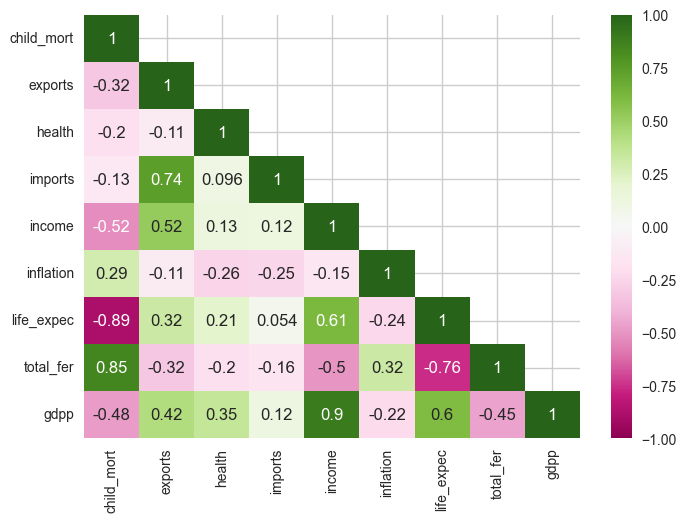

In [80]:
sns.heatmap(data.corr(), vmin=-1, annot=True, cmap='PiYG', mask= np.triu(data.corr(), k=1))   #'coolwarm'
plt.show()

# Visualization

In [9]:
num_cols=data.select_dtypes(np.number)
num_cols

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


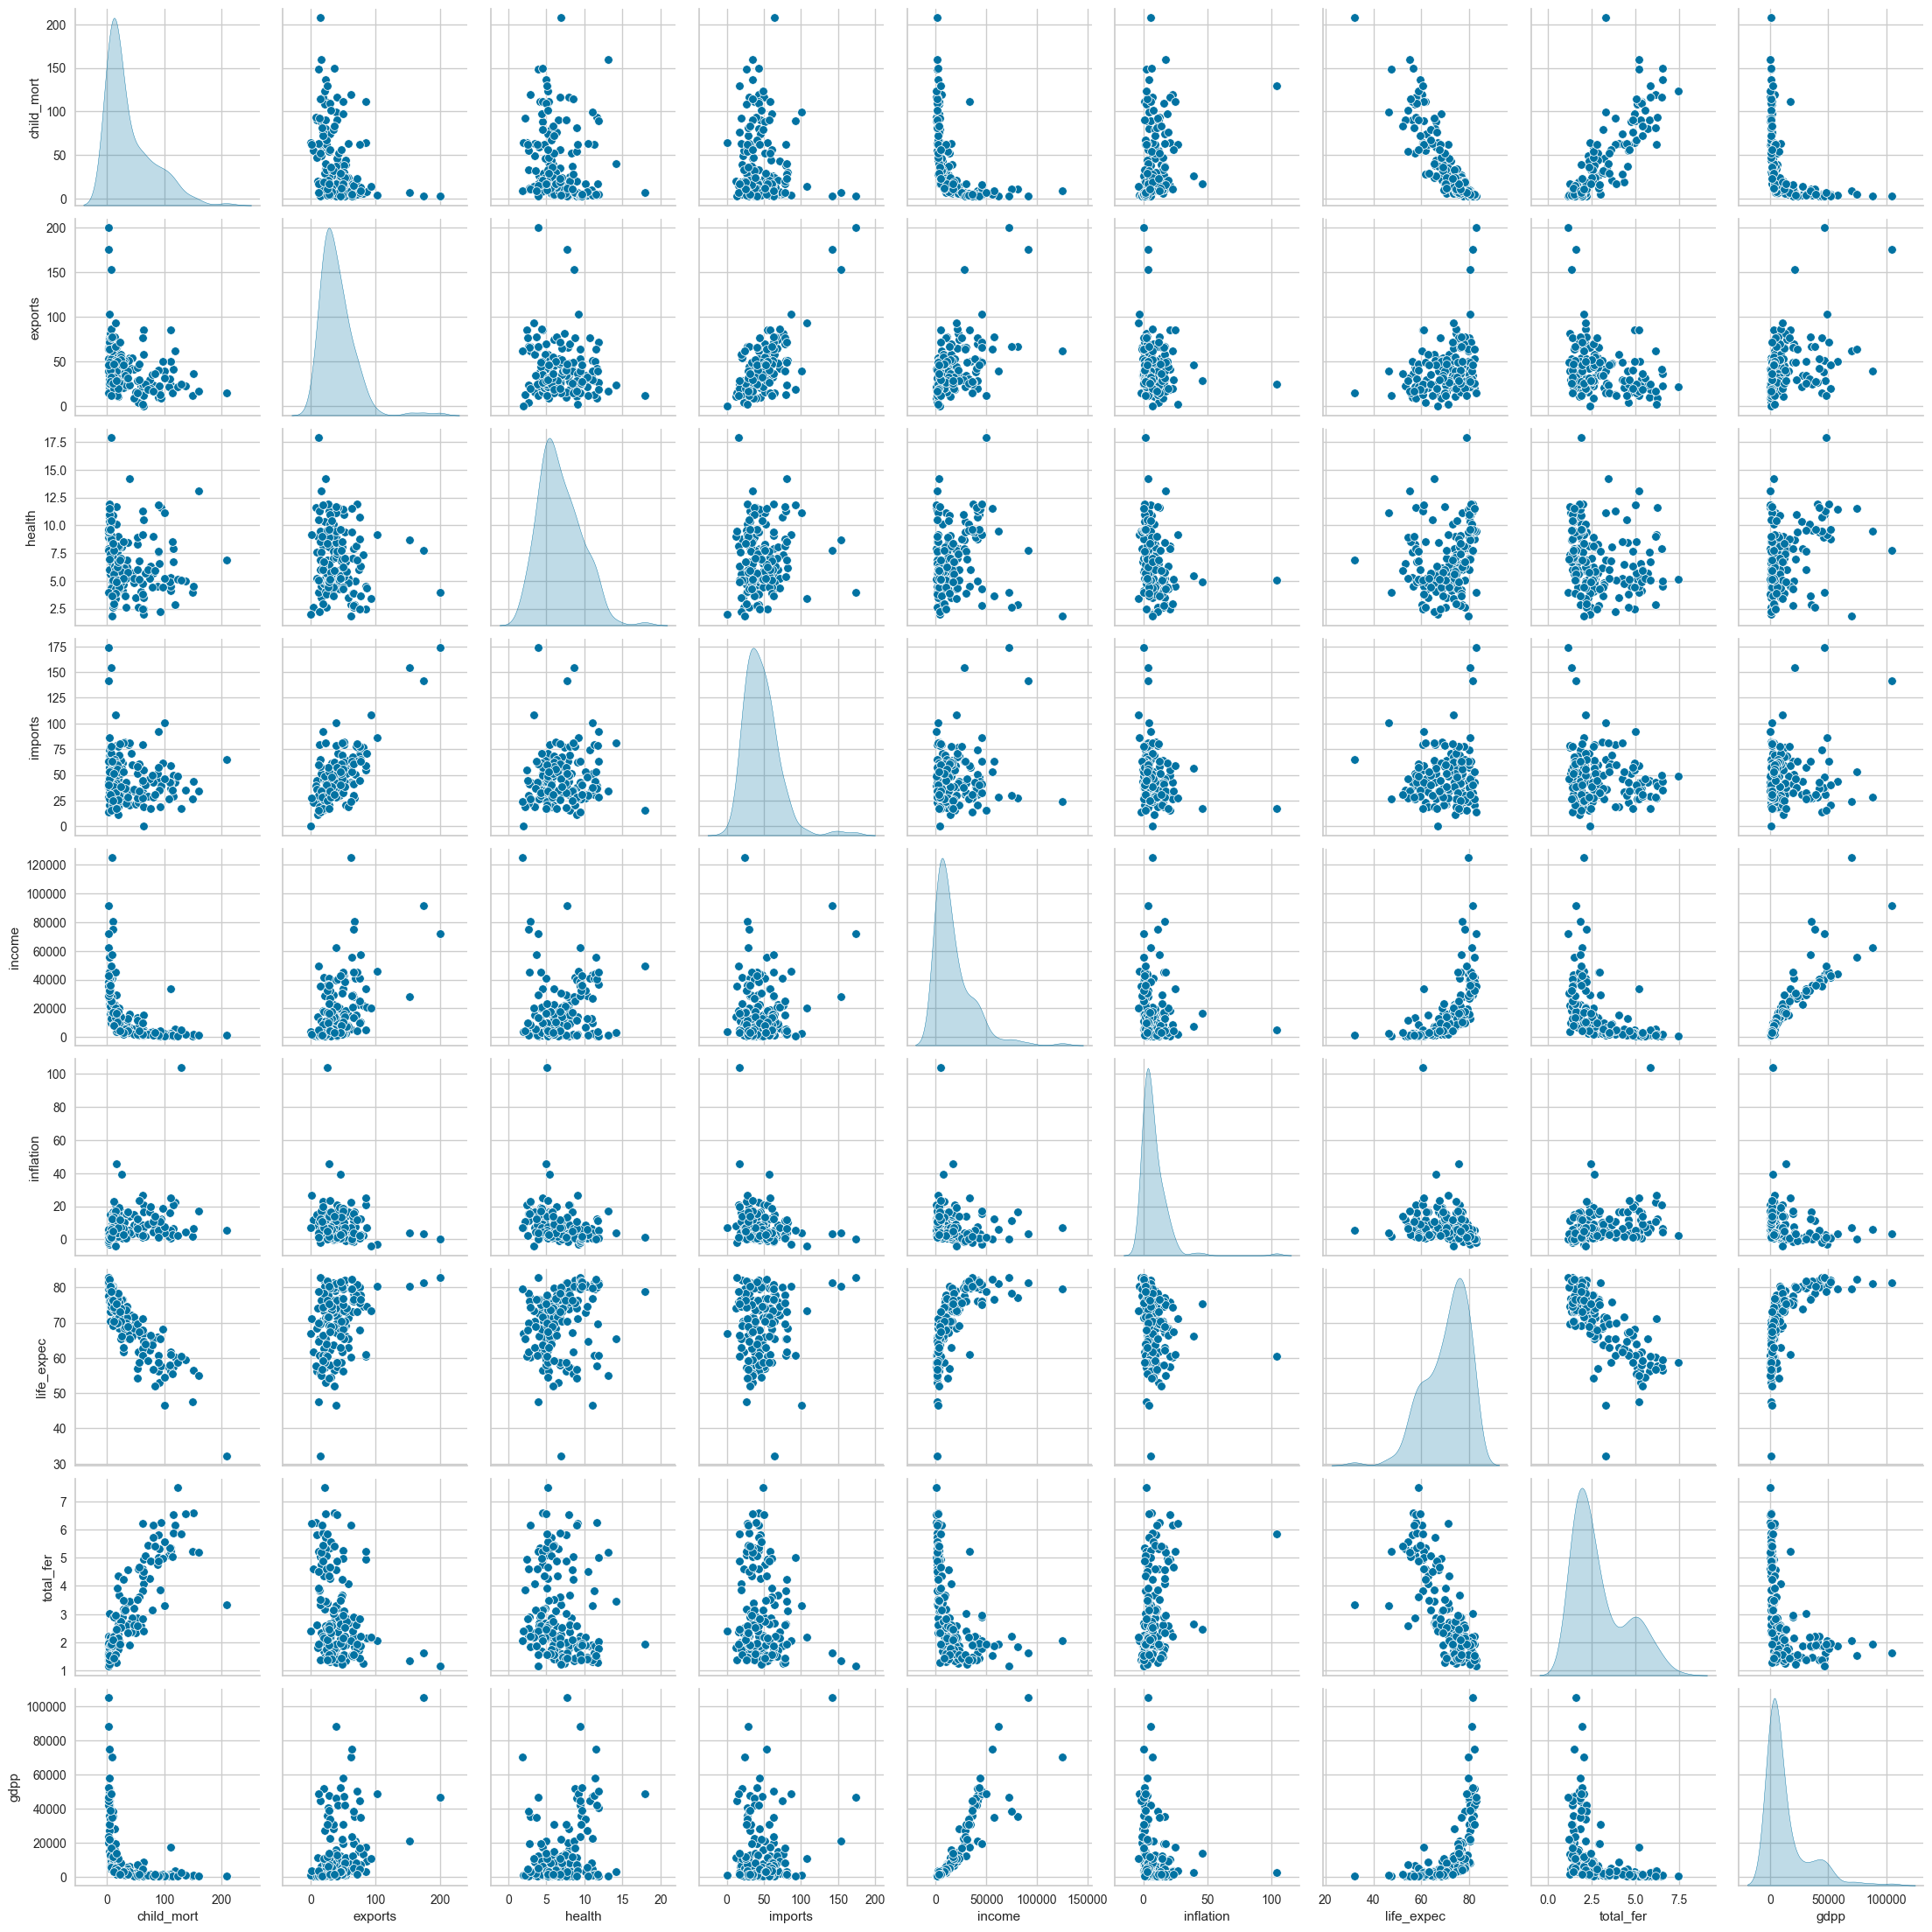

In [10]:
sns.pairplot(data.select_dtypes(include=['int64','float64']), diag_kind='kde') 
#sns.pairplot(num_cols, diag_kind='kde')
plt.show()

# Preprocessing

### Missing values

In [11]:
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Duplicated Values

In [12]:
data.duplicated().sum()

0

### Outlier Treatment and Exploring the Skewness 

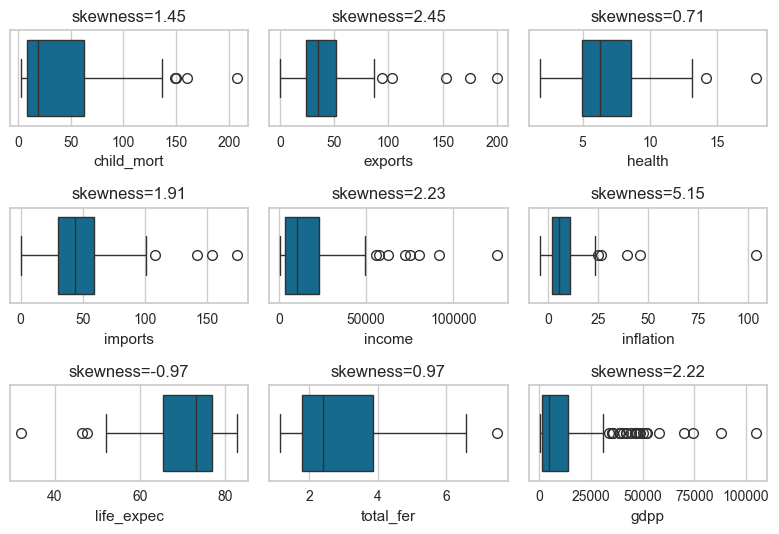

In [13]:
t=1
for i in num_cols:
    plt.subplot(3,3,t)
    sns.boxplot(num_cols, x=i)
    plt.title(f'skewness={round(num_cols[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [14]:
for i in num_cols:
    q1, q3= np.quantile(num_cols[i],[0.25,0.75])
    iqr= q3-q1
    ll, ul= q1-1.5*iqr, q3+1.5*iqr
    
    num_cols[i]=num_cols[i].apply(lambda x:ll if x<ll else ul if x>ul else x)

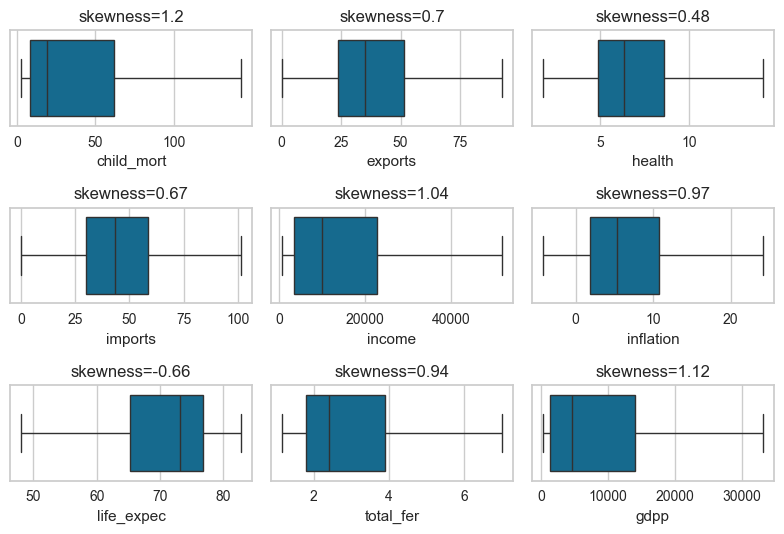

In [15]:
t=1
for i in num_cols:
    plt.subplot(3,3,t)
    sns.boxplot(num_cols, x=i)
    plt.title(f'skewness={round(num_cols[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

### Scaling the Data

In [16]:
sc=StandardScaler()
scaled_data= pd.DataFrame(sc.fit_transform(num_cols), columns=num_cols.columns)

In [17]:
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
162,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
163,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
164,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954
165,0.485332,-0.449374,-0.606208,-0.565251,-0.754642,2.473489,-0.372341,1.149146,-0.780954


#

# PCA

In [18]:
pca= PCA(n_components=9)

In [19]:
pca.fit_transform(scaled_data)

array([[-3.17791739, -0.25129181, -1.01147443, ...,  0.40148216,
         0.42334862, -0.07623064],
       [ 0.43497891, -0.21870044, -0.29259067, ...,  0.18085917,
        -0.25527694, -0.12950113],
       [-0.41678395, -0.61386957,  1.6378586 , ..., -0.1446574 ,
        -0.20577907, -0.094206  ],
       ...,
       [ 0.30557874,  2.15278473,  0.45574515, ..., -0.26146408,
        -0.32505328,  0.1747303 ],
       [-2.27110493, -0.55429645,  1.52496693, ...,  0.06310788,
         0.07219322,  0.10028091],
       [-3.14128798,  0.02500276,  0.36695014, ..., -0.33292986,
         0.70792557,  0.12938886]])

### Kaiser Criterion 

In [20]:
pca.explained_variance_

array([4.42682241, 1.48967656, 1.24556933, 0.86056285, 0.58855308,
       0.18215655, 0.14992503, 0.08143967, 0.02951139])

We will take 3 Principal Components according to the variance they explain.

### Scree Plot

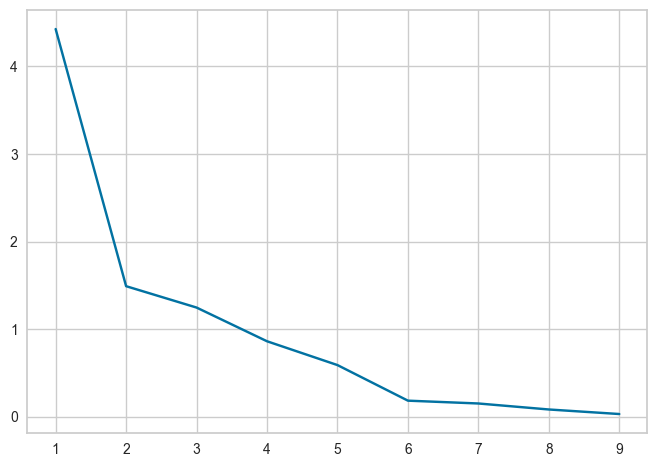

In [21]:
plt.plot(range(1,10), pca.explained_variance_)
plt.show()

We will take 3 PC as per the dips represented by the Scree Plot.

### Explained Variance Ratio
which explains how many columns can explain 90 or 95% variance

In [22]:
pca.explained_variance_ratio_

array([0.48892383, 0.16452848, 0.13756787, 0.09504553, 0.0650032 ,
       0.02011842, 0.01655859, 0.00899467, 0.00325941])

In [23]:
pca.explained_variance_ratio_.cumsum()

array([0.48892383, 0.65345231, 0.79102018, 0.88606572, 0.95106892,
       0.97118734, 0.98774592, 0.99674059, 1.        ])

We will take 5 PC as they explain 95% variance.

In [24]:
pca_final= PCA(n_components=5)
pca_final.fit_transform(scaled_data)

array([[-3.17791739, -0.25129181, -1.01147443,  0.7788036 , -0.01410225],
       [ 0.43497891, -0.21870044, -0.29259067, -1.39124146,  0.15671135],
       [-0.41678395, -0.61386957,  1.6378586 , -0.61502149,  0.53660386],
       [-3.30640928,  1.06664902,  2.15121921,  1.69867748,  0.16055053],
       [ 1.25324554,  0.54777809, -0.13695509, -0.71688976, -0.39462818],
       [-0.02863318, -2.167692  ,  1.04348335, -0.03425022,  1.65971957],
       [-0.20234308, -0.38655563,  0.38794079, -1.63906854,  0.03989662],
       [ 2.65113941, -2.24611465, -0.40630117,  0.64381417, -0.73810242],
       [ 3.4103729 , -0.51021485, -0.82446349,  1.13265715,  0.00403643],
       [-0.21601788, -0.51968515,  1.30455864, -0.15486772,  0.43280187],
       [ 1.77090845, -0.55463675, -0.70399729,  0.14162776, -0.69480284],
       [ 2.08271077,  0.61947445,  1.37207015,  0.60333027, -0.39161565],
       [-1.27343374, -1.12094345,  0.56409882, -1.44233203, -0.64315842],
       [ 1.36687295, -0.1059923 , -0.7

In [25]:
pca_df= pd.DataFrame(pca_final.fit_transform(scaled_data), columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])
pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-3.177917,-0.251292,-1.011474,0.778804,-0.014102
1,0.434979,-0.218700,-0.292591,-1.391241,0.156711
2,-0.416784,-0.613870,1.637859,-0.615021,0.536604
3,-3.306409,1.066649,2.151219,1.698677,0.160551
4,1.253246,0.547778,-0.136955,-0.716890,-0.394628
...,...,...,...,...,...
162,-0.882087,0.945856,-0.227550,-0.680105,-0.551247
163,-0.240053,-1.742315,2.238331,-0.080500,1.318475
164,0.305579,2.152785,0.455745,-0.746171,1.383759
165,-2.271105,-0.554296,1.524967,0.313639,1.295477


#

# K Means Clustering

### K Elbow Plot

In [26]:
kelbow= KElbowVisualizer(estimator=KMeans(), k=10)

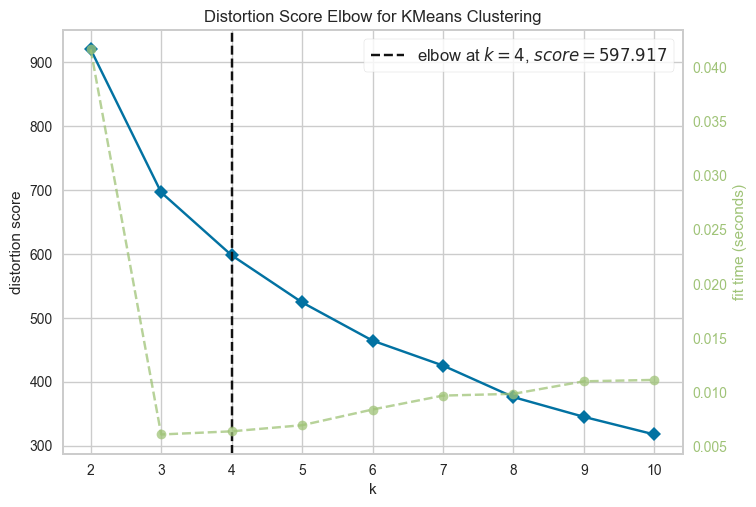

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kelbow.fit(pca_df)
kelbow.show()

### Silhouette Visualizer

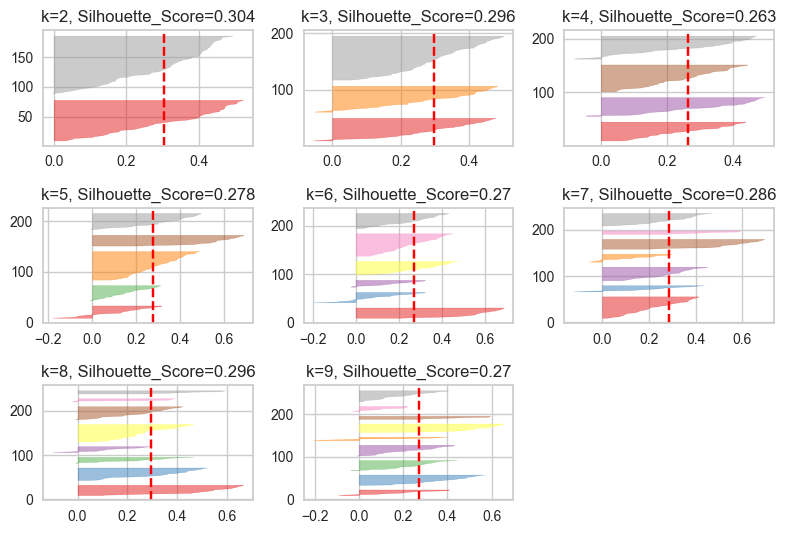

In [28]:
t=1
for i in range(2,10):
    plt.subplot(3,3,t)
    sil_viz= SilhouetteVisualizer(estimator=KMeans(n_clusters=i,random_state=2))
    sil_viz.fit(pca_df)
    plt.title(f'k={i}, Silhouette_Score={round(sil_viz.silhouette_score_, 3)}')
    t+=1

plt.tight_layout()
plt.show()

k=2 and 3 have good Silhouette Score, But silhoutte score is slightly better in k=3. Also the clusters that are formed have fairly good distribution. which means we can take k=2.

In [29]:
kmeans= KMeans(n_clusters=2)
label_kmeans= kmeans.fit_predict(pca_df)

In [30]:
centroids= kmeans.cluster_centers_
centroids

array([[ 1.45493505, -0.06910231,  0.05185078, -0.14857425,  0.03837557],
       [-2.06642949,  0.09814532, -0.07364313,  0.21101849, -0.05450443]])

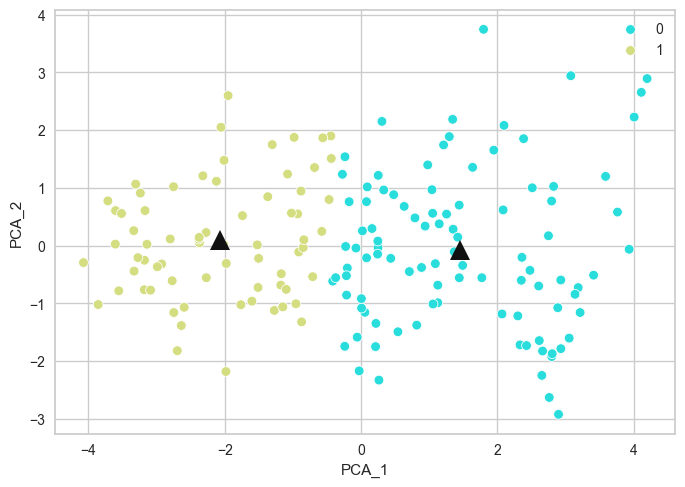

In [31]:
sns.scatterplot(data=pca_df, x='PCA_1', y='PCA_2', hue=label_kmeans, palette='rainbow')

# You typically choose PCA_1 and PCA_2 for visualization since these two components capture the most variance in 
# the data.

for i in range(2):
    plt.plot(centroids[i][0], centroids[i][1], marker='^', color='k', ms=14)

In [32]:
data['labels']=label_kmeans
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0


#

# Business Interpretation

In [33]:
data.groupby(by='labels').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
0,12.171429,48.898980,7.358673,49.348980,26195.306122,5.327051,76.515306,1.938469,20688.571429
1,75.337681,30.044913,6.044493,43.398057,4290.188406,11.268333,62.091304,4.381739,1993.246377


In [34]:
data['labels']=data['labels'].map({0:'Not Developed', 1:'Developed'})

In [35]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Developed
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Not Developed
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Not Developed
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developed
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Not Developed
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developed
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Not Developed
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Not Developed


In [36]:
# Developed Countries

data[data['labels']=='Developed'].index.tolist()

['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [37]:
# Not Developed Countries

data[data['labels']=='Not Developed'].index.tolist()

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

#

# Agglomerative Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

In [50]:
link_mat=linkage(pca_df, method='ward')
link_mat.shape

(166, 4)

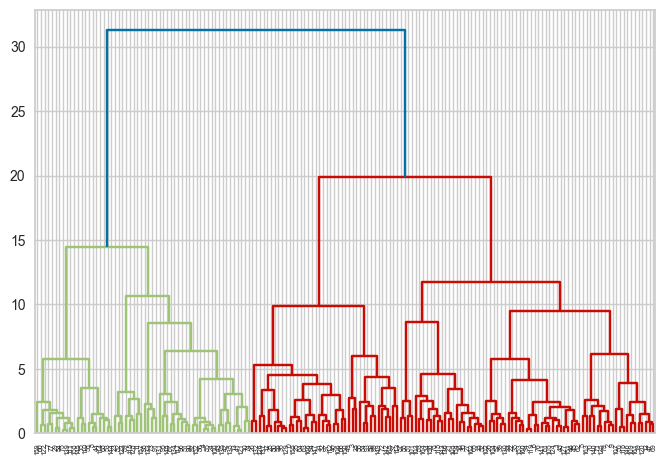

In [51]:
dendrogram(link_mat)
plt.show()

In [52]:
dist_mat= euclidean_distances(pca_df)
dist_mat.shape

(167, 167)

In [53]:
actual_dist= dist_mat[np.triu_indices(167, k=1)]
actual_dist

array([4.27891908, 4.12556803, 3.55426235, ..., 4.03011322, 4.62149626,
       2.13647903])

In [54]:
ccc, cophenetic_dist= cophenet(link_mat, actual_dist)

In [55]:
ccc

0.581209522893607

In [56]:
model_agglo= AgglomerativeClustering(n_clusters=3)
labels_agglo= model_agglo.fit_predict(pca_df)

In [57]:
labels_agglo

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [58]:
silhouette_score(pca_df, labels_agglo)

0.24641649126149606

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

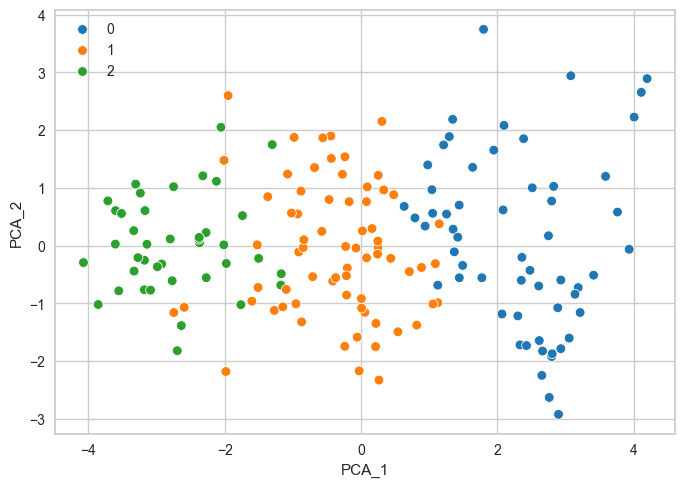

In [59]:
sns.scatterplot(pca_df, x='PCA_1', y='PCA_2', hue=labels_agglo, palette='tab10')